Upload the image for processing:


Saving IMAGE OF TASK 03.jpeg to IMAGE OF TASK 03 (1).jpeg


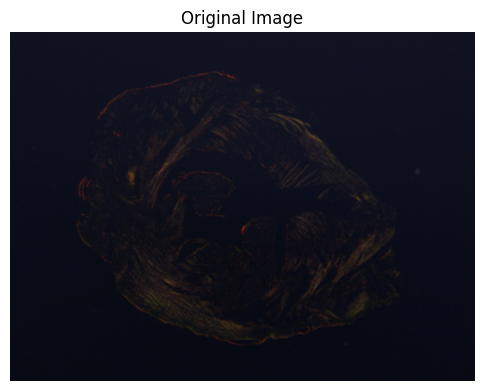

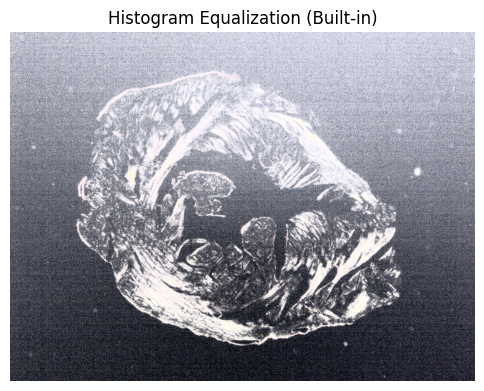

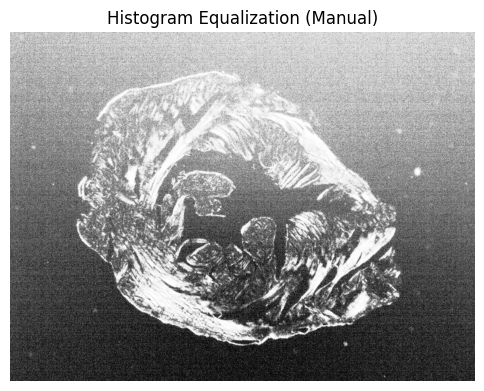

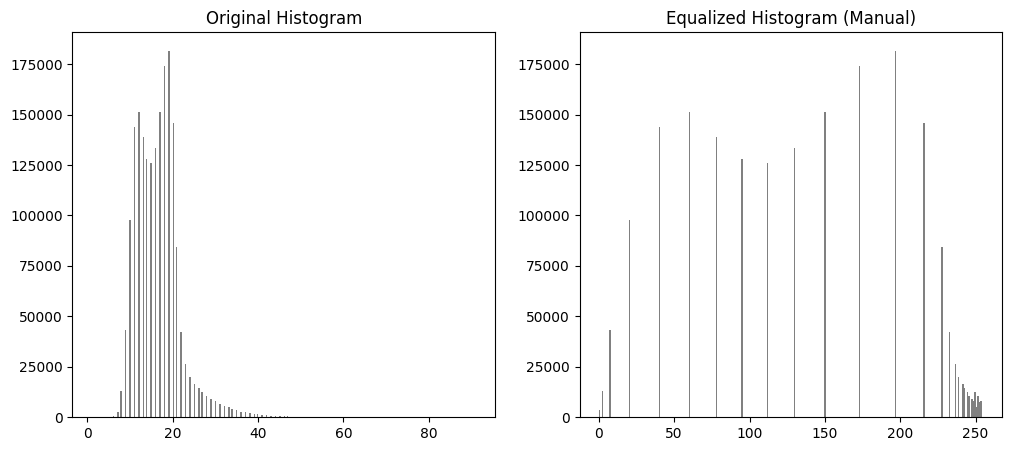

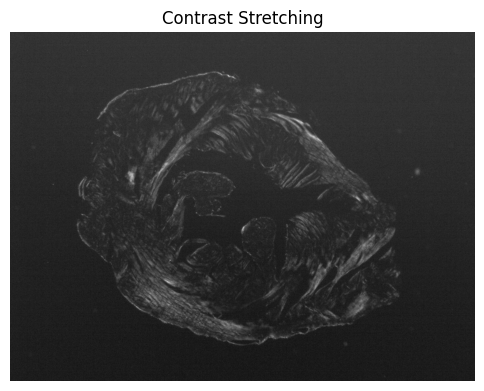

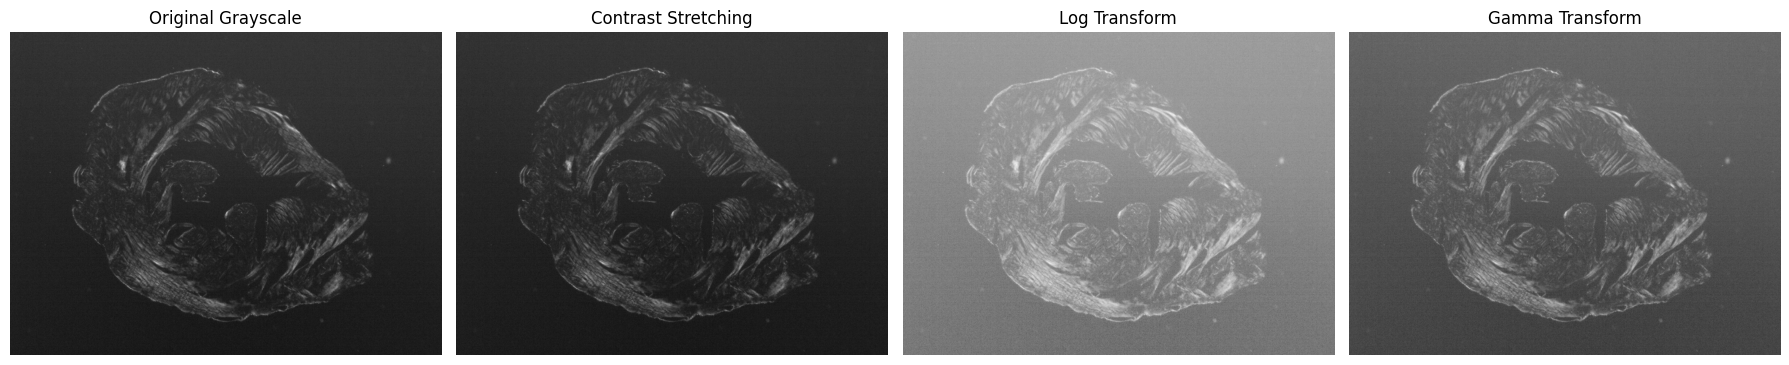

In [2]:
# =============================================
# Task 3: Histogram Equalization and Contrast Enhancement
# =============================================

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# --------------------------
# Step 1: Upload Image
# --------------------------
print("Upload the image for processing:")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read and convert image to RGB
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Image not loaded! Check the file format or path.")
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display Original Image
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

# --------------------------
# Step 2: Built-in Histogram Equalization
# --------------------------
# Convert to YCrCb color space (luminance channel)
img_ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
img_ycrcb[:, :, 0] = cv2.equalizeHist(img_ycrcb[:, :, 0])  # Equalize Y channel
equalized_builtin = cv2.cvtColor(img_ycrcb, cv2.COLOR_YCrCb2RGB)

plt.figure(figsize=(6,6))
plt.imshow(equalized_builtin)
plt.title("Histogram Equalization (Built-in)")
plt.axis('off')
plt.show()

# --------------------------
# Step 3: Manual Histogram Equalization (Grayscale)
# --------------------------
def manual_hist_equalization(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Compute histogram
    hist, _ = np.histogram(gray.flatten(), 256, [0,256])
    # Compute cumulative distribution function (CDF)
    cdf = hist.cumsum()
    # Mask zeros and normalize
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    # Map original grayscale to equalized
    return cdf[gray]

manual_eq = manual_hist_equalization(image)

plt.figure(figsize=(6,6))
plt.imshow(manual_eq, cmap='gray')
plt.title("Histogram Equalization (Manual)")
plt.axis('off')
plt.show()

# --------------------------
# Step 4: Histogram Comparison
# --------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).ravel(), bins=256, color='gray')
plt.title("Original Histogram")
plt.subplot(1,2,2)
plt.hist(manual_eq.ravel(), bins=256, color='gray')
plt.title("Equalized Histogram (Manual)")
plt.show()

# --------------------------
# Step 5: Contrast Stretching
# --------------------------
def contrast_stretching(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    r_min, r_max = np.min(gray), np.max(gray)
    stretched = ((gray - r_min) / (r_max - r_min)) * 255
    return stretched.astype(np.uint8)

contrast_img = contrast_stretching(image)

plt.figure(figsize=(6,6))
plt.imshow(contrast_img, cmap='gray')
plt.title("Contrast Stretching")
plt.axis('off')
plt.show()

# --------------------------
# Step 6: Log Transform
# --------------------------
def log_transform(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    c = 255 / np.log(1 + np.max(gray))
    log_img = c * np.log(1 + gray)
    return log_img.astype(np.uint8)

log_img = log_transform(image)

# --------------------------
# Step 7: Gamma Transform
# --------------------------
def gamma_transform(img, gamma=1.0):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    normalized = gray / 255.0
    gamma_corrected = np.power(normalized, gamma)
    return (gamma_corrected * 255).astype(np.uint8)

gamma_img = gamma_transform(image, gamma=0.5)

# --------------------------
# Step 8: Display All Transformations Together
# --------------------------
titles = ['Original Grayscale', 'Contrast Stretching', 'Log Transform', 'Gamma Transform']
images = [
    cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),
    contrast_img,
    log_img,
    gamma_img
]

plt.figure(figsize=(18,5))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()